<a href="https://colab.research.google.com/github/PrinceWallyy/ACML-Assignment-2/blob/main/ACML_Assignment_2_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils import np_utils

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
data = np.vstack((x_train, x_test))
data = data / 255
(x_train, x_val, x_test) = np.vsplit(data, np.array([48000, 54000]))
assert x_train.shape == (48000, 32, 32, 3)
assert x_val.shape == (6000, 32, 32, 3)
assert x_test.shape == (6000, 32, 32, 3)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_gray_train = tf.image.rgb_to_grayscale(x_train)
x_gray_val = tf.image.rgb_to_grayscale(x_val)
x_gray_test = tf.image.rgb_to_grayscale(x_test)

In [4]:
x_yiq_train = tf.image.rgb_to_yiq(x_train)
x_yiq_val = tf.image.rgb_to_yiq(x_val)
x_yiq_test = tf.image.rgb_to_yiq(x_test)

x_iq_train = np.delete(x_yiq_train, 0, axis=3)
x_iq_val = np.delete(x_yiq_val, 0, axis=3)
x_iq_test = np.delete(x_yiq_test, 0, axis=3)

# Grayscale - RGB

In [5]:
input_shape = (32, 32, 1)

In [6]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(32,(7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(64, (7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

  return model

In [7]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          50208     
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 32)       0

In [8]:
history = model.fit(x_gray_train, x_train, epochs=10, validation_data=(x_gray_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 49s 14ms/step - loss: 0.0130 - accuracy: 0.4660 - val_loss: 0.0106 - val_accuracy: 0.4973
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0094 - accuracy: 0.4836 - val_loss: 0.0090 - val_accuracy: 0.5158
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0087 - accuracy: 0.4889 - val_loss: 0.0083 - val_accuracy: 0.4810
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0083 - accuracy: 0.4938 - val_loss: 0.0091 - val_accuracy: 0.4617
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0079 - accuracy: 0.4993 - val_loss: 0.0088 - val_accuracy: 0.5267
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0077 - accuracy: 0.5019 - val_loss: 0.0085 - val_accuracy: 0.4680
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0075 - accuracy: 0.5049 - val_loss: 0.0074 -

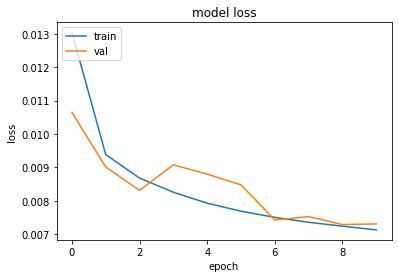

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_gray_test, x_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.5190
Test Error Rate:  48.1


In [11]:
pred_imgs = model.predict(x_gray_test)

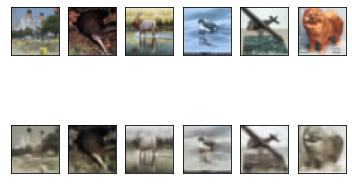

In [12]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Grayscale - Chrominance

In [13]:
input_shape = (32, 32, 1)

In [14]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16, (7, 7), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16,(7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(2, (3, 3), padding='same', activation='tanh'))

  return model

In [15]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        25104     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          12560     
                                                                 
 up_sampling2d_2 (UpSampling  (None, 16, 16, 16)      

In [16]:
history = model.fit(x_gray_train, x_iq_train, epochs=10, validation_data=(x_gray_val, x_iq_val))

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0035 - accuracy: 0.6752 - val_loss: 0.0034 - val_accuracy: 0.6860
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0034 - accuracy: 0.6870 - val_loss: 0.0034 - val_accuracy: 0.6808
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0033 - accuracy: 0.6911 - val_loss: 0.0033 - val_accuracy: 0.6892
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0033 - accuracy: 0.6940 - val_loss: 0.0034 - val_accuracy: 0.6842
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0033 - accuracy: 0.6967 - val_loss: 0.0033 - val_accuracy: 0.6986
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0032 - accuracy: 0.6979 - val_loss: 0.0033 - val_accuracy: 0.6914
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0032 - accuracy: 0.6992 - val_loss: 0.0032 -

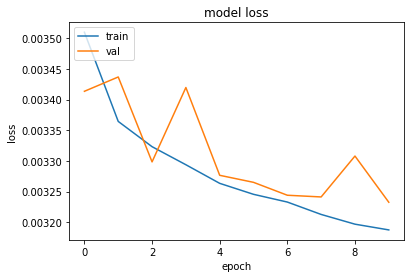

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
loss, accuracy = model.evaluate(x_gray_test, x_iq_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 7ms/step - loss: 0.0032 - accuracy: 0.6997
Test Error Rate:  30.03


In [19]:
pred_iq_imgs = model.predict(x_gray_test)
pred_yiq_imgs = np.concatenate((x_gray_test, pred_iq_imgs), axis=3)
pred_rgb_imgs = tf.image.yiq_to_rgb(pred_yiq_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


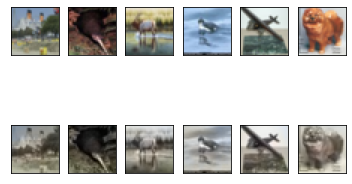

In [20]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_rgb_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()